# Predicting a Heart Disease Patient using Machine Learning(Classification)

## Problem Definition:
The primary objective of this project is to develop a predictive model capable of accurately identifying individuals at risk of heart disease based on various clinical and demographic features given in data set.

In [5]:
# Importing all libaries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Modification

In [6]:
# Import Data set
df=pd.read_csv("./heart disease_dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [7]:
# Getting the information needed from data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


In [8]:
# Convert sex and target column to Numerical

# Checking for how many types each class has ? 
print (df["sex"].value_counts())
print("\n")
print(df["target"].value_counts())


# Convert sex column non-numerical to numerical
df["sex"]= df["sex"].map({"male":1,"female":0})

# Converting target column non numerical to numerical
df["target"]=df["target"].map({"yes":1,"no":0})

sex
male      207
female     96
Name: count, dtype: int64


target
yes    165
no     138
Name: count, dtype: int64


In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1


In [10]:
# Check for missing values in our data set
df.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# Fill the missing values with mean

# we are filling "trestbps" eith it's mean
df["trestbps"]=df["trestbps"].fillna(df["trestbps"].mean())

# we are droping row of chol with missing values
df["chol"]=df["chol"].fillna(df["chol"].mean())

# we are filling "thalach" eith it's mean
df["thalach"]=df["thalach"].fillna(df["thalach"].mean())


In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.511894,51.822273,0.356198,0.525860,22.376122,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Features Comparising and Extraction

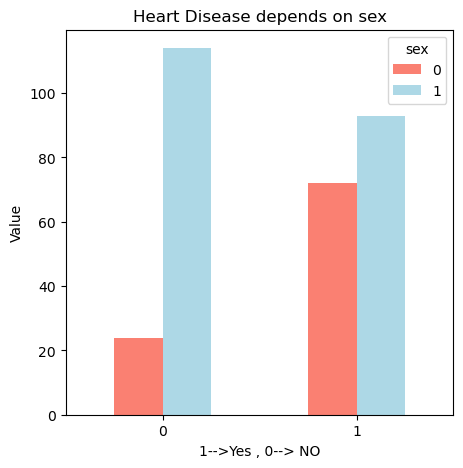

In [14]:
# Compare target with other features

#  Comparing target with sex and ploting a graph
cross_tab=pd.crosstab(df.target,df.sex)
cross_tab.plot(kind="bar",figsize=(5,5),color=["salmon","lightblue"])
plt.title("Heart Disease depends on sex")
plt.xlabel("1-->Yes , 0--> NO")
plt.ylabel("Value")
plt.xticks(rotation=0);
plt.show()


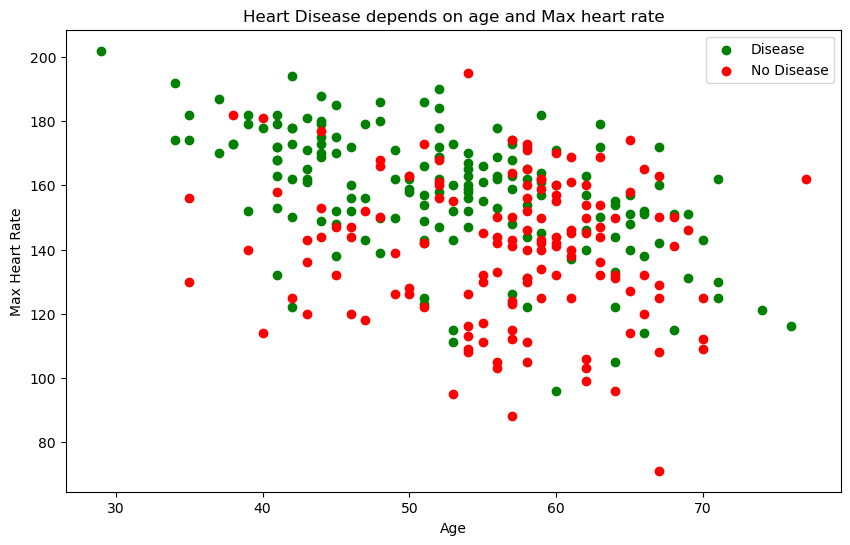

In [15]:
# Compare age and thalach with target
plt.figure(figsize=(10,6))

# we are using scatter graph to compare
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="green") # for +ve

plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="red")
plt.title("Heart Disease depends on age and Max heart rate")
plt.xlabel("Age")
plt.legend(["Disease","No Disease"]);
plt.ylabel("Max Heart Rate")
plt.show()

<Figure size 1000x600 with 0 Axes>

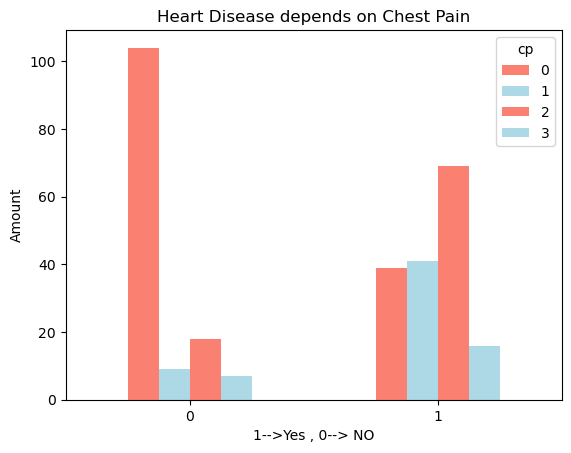

In [16]:
# Compare target with chest pain (cp)
plt.figure(figsize=(10,6))
cross_tab=pd.crosstab(df["target"],df["cp"])
cross_tab.plot(kind="bar",color =["salmon","lightblue"])
plt.title("Heart Disease depends on Chest Pain")
plt.xlabel("1-->Yes , 0--> NO")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()


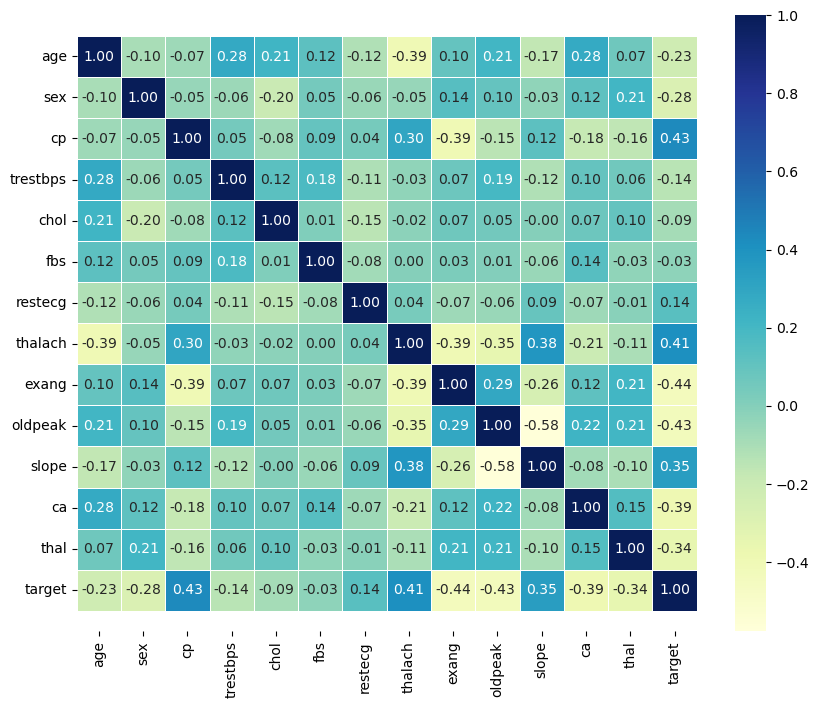

In [17]:
# Let's make Correlation Matrix on our data
corr_matrix=df.corr() # Correlation matrix 
fig,ax=plt.subplots(figsize=(10,8))

ax=sns.heatmap(corr_matrix,annot=True,fmt=".2f",linewidths=0.5,cmap="YlGnBu");
bottom , top =ax.get_ylim()
ax.set_ylim(bottom + 0.5 ,top -0.5);

## Modelling the modified Data set

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,1


In [19]:
# Split the Data set  to X and Y
x=df.drop("target",axis=1)
print(x.head())
print("\n")
print("*********************************")
print("\n")
y=df["target"]
y

   age  sex  cp    trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   3  145.000000  233.0    1        0    150.0      0      2.3   
1   37    1   2  130.000000  250.0    0        1    187.0      0      3.5   
2   41    0   1  130.000000  204.0    0        0    172.0      0      1.4   
3   56    1   1  120.000000  236.0    0        1    178.0      0      0.8   
4   57    0   0  131.712375  354.0    0        1    163.0      1      0.6   

   slope  ca  thal  
0      0   0     1  
1      0   0     2  
2      2   0     2  
3      2   0     2  
4      2   0     2  


*********************************




0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
# Split the Data into training and testing data
np.random.seed(42)
from sklearn.model_selection import train_test_split

# Shuffle Data set 
df=df.sample(frac=1)

'''train_split=round(0.8*len(df))
#test_split=round(train_split+0.2*len(df))

# spliting traing data 
x_train , y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:] , y[train_split:]'''

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [21]:
'''We are using 3 different model to predict 
1. Logistic Regression
2. KNN Classifier
3. Random Forest Classifier 

'''
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Dictionary containing models
models = {
    'LogisticRegression': LogisticRegression(),
    'KNN Classifer':KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier()
}

# Creating a function to fit and find scores of the model
def fit_and_score(models,x_train,y_train,x_test,y_test):
    
    np.random.seed(42)
    
    models_scores= {}  # tracking the model scores in this dictionary

    for name ,  model in models.items():
        
        # fit the model
        model.fit(x_train,y_train)
        
        # Model scores
        model_score=model.score(x_test,y_test)
        
        models_scores[name]=model_score
    
    return models_scores

        

In [22]:
model_scores=fit_and_score(models,x_train, y_train, x_test, y_test)
model_scores

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8360655737704918,
 'KNN Classifer': 0.5573770491803278,
 'RandomForest': 0.8524590163934426}

<Axes: >

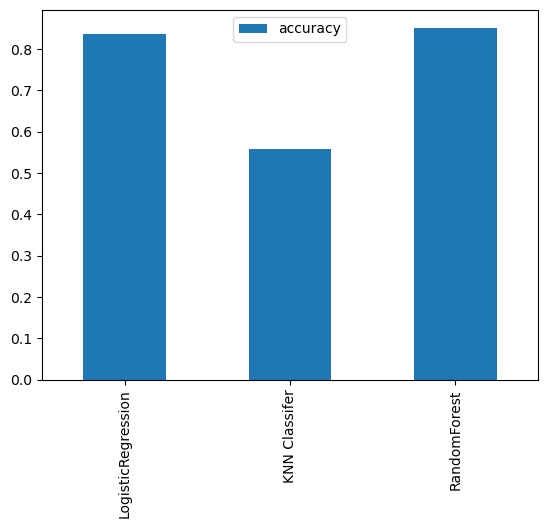

In [23]:
# Compare the models
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

#### We didn't get our desired score on baseline model predictions.So we gonna do some matrics to improve it:
1. Tune Hyper Parameters

In [24]:
lg=LogisticRegression()
lg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-6, 6, 60),
                "solver": ["liblinear"]}

In [26]:
# AS we see Logistic Regeression has more accuracy score we are gonna tune it's hyper parameters
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=10,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [27]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 20.991037201085547}

In [28]:
rs_log_reg.score(x_test,y_test) 
# We were not able to increase our model score by tunning Hyper Parameters

0.8524590163934426

### Evalution our Model

In [29]:
# Prediction done by our tunned model
y_preds=rs_log_reg.predict(x_test)
y_preds

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [30]:
y_test

231    0
301    0
104    1
292    0
159    1
      ..
233    0
8      1
184    0
296    0
40     1
Name: target, Length: 61, dtype: int64

In [31]:
# Check best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 20.991037201085547}

In [32]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=20.991037201085547,
                         solver="liblinear")

In [33]:
from sklearn.model_selection import cross_val_score
# Cross-validated accuracy
cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8248633879781421

In [34]:
# Cross-validated Precision
cv_pre = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_pre = np.mean(cv_pre)
cv_pre

0.8185145372645373

In [35]:
# Cross-validated Recall
cv_rec = cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.8787878787878787

In [36]:
# Cross-validated F1 score
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8464281258647457

<Axes: title={'center': 'Cross-Validated Classification Metrics'}>

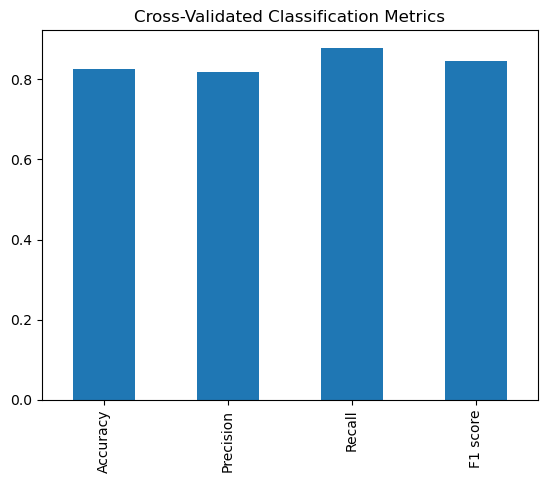

In [37]:
# Visulization of Cross val score
cv=pd.DataFrame({'Accuracy':cv_acc,'Precision':cv_pre,'Recall':cv_rec,'F1 score':cv_f1},index=[0])

cv.T.plot.bar(title='Cross-Validated Classification Metrics',legend=False)